# Analysis of HerosOfPymoli Dataset

# Section 1: Setup

In [29]:
#Import Dependencies
import pandas as pd
import os

#Define relative path and read purchase_data.csv
path = os.path.join('Resources','purchase_data.csv')
df = pd.read_csv(path)

In [30]:
#Review contents of dataset
df.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [31]:
#Review columns data types and row numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Purchase ID  780 non-null    int64  
 1   SN           780 non-null    object 
 2   Age          780 non-null    int64  
 3   Gender       780 non-null    object 
 4   Item ID      780 non-null    int64  
 5   Item Name    780 non-null    object 
 6   Price        780 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 42.8+ KB


In [32]:
#Verify we don't have rows with NaN
df.isna().any()

Purchase ID    False
SN             False
Age            False
Gender         False
Item ID        False
Item Name      False
Price          False
dtype: bool

In [33]:
#Verify we don't have rows with NaN
df.isnull().any()

Purchase ID    False
SN             False
Age            False
Gender         False
Item ID        False
Item Name      False
Price          False
dtype: bool

# Section 2: Player Count

In [34]:
#Players are based on SN so we will verify total number of players based on unique SN
unique_player = df['SN'].unique()

#Store total number of players in variable
total_player = len(unique_player)

#Visualize total number of players as datafram
total_playerdf = pd.DataFrame([{'Player Count':total_player}])
total_playerdf

,Player Count
0,576


# Section 3: Purchasing Analysis

In [35]:
#Get the number of unique items in the game based on Item ID
unique_items = df['Item ID'].unique()
total_items = len(unique_items)

#Get average purchase price
avg_price = df['Price'].mean()

#Get total number of purchases (each row is a purchase: number of observations)
total_purchase = len(df)

#Get total revenue
total_revenue = df['Price'].sum()

#Create Purchasing Analysis data frame
panalysisdf = pd.DataFrame([{'Number Unique Items': total_items,
                            'Avg Purchase Price':avg_price,
                            'Total Number Purchases':total_purchase,
                            'Total Revenue':total_revenue}])

#Format Avg Purchase Price and Total Revenue
panalysisdf['Avg Purchase Price']=panalysisdf['Avg Purchase Price'].map('${:.2f}'.format)
panalysisdf['Total Revenue']=panalysisdf['Total Revenue'].map('${:,.2f}'.format)

#Visualize Purchasing Analysis data frame
panalysisdf

,Number Unique Items,Avg Purchase Price,Total Number Purchases,Total Revenue
0,179,$3.05,780,"$2,379.77"


# Section 4: Demographics Analysis

In [36]:
#Create new df for players
playerdf = df[['SN','Gender','Age']]

#Drop duplicates to get unique count of players
playerdf = playerdf.drop_duplicates(subset=['SN'])

#Get percentage and count of male players
total_male = len(playerdf.loc[df['Gender']=='Male'])
percent_male = total_male/total_player*100

#Get percentage and count of female players
total_female = len(playerdf.loc[df['Gender']=='Female'])
percent_female = total_female/total_player*100

#Get percentage and count of Other / Non-Disclosed
total_other = len(playerdf.loc[df['Gender']=='Other / Non-Disclosed'])
percent_other = total_other/total_player*100

#Build Gender Analysis data frame
ganalysisdf = pd.DataFrame({'Total Count': [total_male, total_female,total_other,total_player],
                            '% of Players':[percent_male,percent_female,percent_other,100]},
                           ['Male','Female','Other / Non-Disclosed','TOTAL'])

#Format column % of Players
ganalysisdf['% of Players']=ganalysisdf['% of Players'].map('{:.2f}%'.format)

#Rename Axis
ganalysisdf.rename_axis('Gender', inplace=True)

#Visualize  Gender Analysis data fram
ganalysisdf

,Total Count,% of Players
Gender,,
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%
TOTAL,576,100.00%


# Section 5: Purchase Analysis per Demographic 

In [37]:
#Calculate Purchase Count per Gender
pcount_male = len(df.loc[df['Gender']=='Male'])
pcount_female = len(df.loc[df['Gender']=='Female'])
pcount_other = len(df.loc[df['Gender']=='Other / Non-Disclosed'])

#Calculate Average Purchase Price per Gender
pavg_male = df.loc[df['Gender']=='Male']['Price'].mean()
pavg_female = df.loc[df['Gender']=='Female']['Price'].mean()
pavg_other = df.loc[df['Gender']=='Other / Non-Disclosed']['Price'].mean()

#Calculate Total Purchase Value per Gender
ptotal_male = df.loc[df['Gender']=='Male']['Price'].sum()
ptotal_female = df.loc[df['Gender']=='Female']['Price'].sum()
ptotal_other = df.loc[df['Gender']=='Other / Non-Disclosed']['Price'].sum()

#Calculate Average Purche Total per Person per Gender
ptotalavg_male = ptotal_male/total_male
ptotalavg_female = ptotal_female/total_female
ptotalavg_other = ptotal_other/total_other

#Build Purchase Analysis per Demographics data frame
pdemanalysisdf = pd.DataFrame({'Purchase Count': [pcount_male, pcount_female,pcount_other],
                            'Avg Purchase Price':[pavg_male,pavg_female,pavg_other],
                            'Total Purchase Price':[ptotal_male,ptotal_female,ptotal_other],
                            'Avg Purchase Total per Person':[ptotalavg_male,ptotalavg_female,ptotalavg_other]},
                           ['Male','Female','Other / Non-Disclosed'])

#Format column Avg Purchase Price, Total Purchase Price, and Avg Purchase Total per Person
pdemanalysisdf['Avg Purchase Price']=pdemanalysisdf['Avg Purchase Price'].map('${:.2f}'.format)
pdemanalysisdf['Total Purchase Price']=pdemanalysisdf['Total Purchase Price'].map('${:,.2f}'.format)
pdemanalysisdf['Avg Purchase Total per Person']=pdemanalysisdf['Avg Purchase Total per Person'].map('${:.2f}'.format)

#Rename Axis
pdemanalysisdf.rename_axis('Gender', inplace=True)

#Visualize Purchase Analysis per Demographics data frame
display(pdemanalysisdf)

,Purchase Count,Avg Purchase Price,Total Purchase Price,Avg Purchase Total per Person
Gender,,,,
Male,652,$3.02,"$1,967.64",$4.07
Female,113,$3.20,$361.94,$4.47
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


# Section 6: Age Demographics

In [38]:
#Braking data into 8 bins of 4 years
#<10, 10-14, 15-19, 20-24,25-29,30-34,35-39,40+
age_bins = [6,9,14,19,24,29,34,39,45]
age_labels = ['<10','10-14','15-19','20-24','25-29','30-34','35-39','40+']
playerdf['Age_Range'] = pd.cut(playerdf['Age'],bins = age_bins,labels=age_labels)

#Create new dataframe based on Age_Range
agedf = playerdf.groupby(by='Age_Range').count()
agedf.drop(['SN','Gender'], axis=1,inplace=True)
agedf.rename(columns={'Age':'Total Count'}, inplace=True)

#Add Percentage Column
agedf['% of Players'] = agedf['Total Count']/total_player*100
agedf['% of Players']= agedf['% of Players'].map('{:.2f}%'.format)

#Visualize Age Demographics data frame
agedf

,Total Count,% of Players
Age_Range,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


# Purchase Analysis per Age

In [39]:
#Braking data into 8 bins of 4 years for Purchase Dataset
#<10, 10-14, 15-19, 20-24,25-29,30-34,35-39,40+
purdf = df.copy()
age_bins = [6,9,14,19,24,29,34,39,45]
age_labels = ['<10','10-14','15-19','20-24','25-29','30-34','35-39','40+']
purdf['Age_Range'] = pd.cut(purdf['Age'],bins = age_bins,labels=age_labels)

#Create new dataframe based on Purchases by Age_Range
agepurdf = purdf.groupby(by='Age_Range').count()
agepurdf.drop(['Purchase ID','Age','Gender','Item ID','Item Name','Price'], axis=1,inplace=True)
agepurdf.rename(columns={'SN':'Purchase_Count'}, inplace=True)

#Create Avg Purchase Price Column
agepurdf['Avg Purchase Price'] = purdf.groupby(by='Age_Range').mean()['Price']

#Create Total Purchase Value Column
agepurdf['Total Purchase Value'] = purdf.groupby(by='Age_Range').sum()['Price']

#Create Averga Total Purchase per Person Column
agepurdf['Avg Total Purchase per Person'] = agepurdf['Total Purchase Value'] / agedf['Total Count']

#Fix formats for columns with financial data
agepurdf['Avg Purchase Price'] = agepurdf['Avg Purchase Price'].map('${:.2f}'.format)
agepurdf['Total Purchase Value'] = agepurdf['Total Purchase Value'].map('${:,.2f}'.format)
agepurdf['Avg Total Purchase per Person'] = agepurdf['Avg Total Purchase per Person'].map('${:.2f}'.format)

#Visualize Purchase Analysis per Age Dataframe
agepurdf


,Purchase_Count,Avg Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age_Range,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


# Section 7: Top Spenders

In [40]:
#Create new df for Top 5 spenders
topspend = df.groupby(by='SN').sum().sort_values('Price',ascending=False).head(5)
topspend.drop(['Purchase ID','Age','Item ID',], axis=1,inplace=True)
topspend.rename(columns={'Price':'Total_Purchase_Value'}, inplace=True)

#Add Purchase Count Column for Identified  Top Spenders
counts = []
for x in range(0,len(topspend.index)):
 counts.append(len(df.loc[df['SN']==topspend.index[x]]))

topspend['Purchase_Count'] = counts

#Add Average Purchase Price column
topspend['Avg_Purchase_Price'] = topspend['Total_Purchase_Value']/topspend['Purchase_Count']

#Fix formats for columns with financial data
topspend['Total_Purchase_Value'] = topspend['Total_Purchase_Value'].map('${:.2f}'.format)
topspend['Avg_Purchase_Price'] = topspend['Avg_Purchase_Price'].map('${:.2f}'.format)

#Reorder columns to have Total_Purchase_Value at the end
topspend = topspend[['Purchase_Count','Avg_Purchase_Price','Total_Purchase_Value']]

#Visualize Top Spenders dataframe
topspend

,Purchase_Count,Avg_Purchase_Price,Total_Purchase_Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


# Section 8: Most Popular Items

In [41]:
#Create new df for Top 5 Items
topitems = df.groupby(by=['Item ID','Item Name']).count().sort_values('Price',ascending=False).head(5)
topitems.drop(['SN','Age','Gender','Price'], axis=1,inplace=True)
topitems.rename(columns={'Purchase ID':'Purchase_Count'}, inplace=True)

#Add individual item price, we use the average as some items have different unitary price
price = []
for x in range(0,len(topitems.index)):
 price.append(df.loc[df['Item ID']==topitems.index[x][0]]['Price'].mean())

topitems['Item_Price']=price

#Add Total Purchase value column
topitems['Total_Purchase_Value'] = topitems['Purchase_Count']*topitems['Item_Price']

#Fix formats for columns with financial data
topitems['Item_Price'] = topitems['Item_Price'].map('${:.2f}'.format)
topitems['Total_Purchase_Value'] = topitems['Total_Purchase_Value'].map('${:.2f}'.format)

#Visualize Top Items Dataframe
topitems

,,Purchase_Count,Item_Price,Total_Purchase_Value
Item ID,Item Name,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
132,Persuasion,9,$3.22,$28.99
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77


# Section 9: Most Profitable Items

In [42]:
#Create new df for Top 5 Items
pitems = df.groupby(by=['Item ID','Item Name']).sum().sort_values('Price',ascending=False).head(5)
pitems.drop(['Purchase ID','Age'], axis=1,inplace=True)
pitems.rename(columns={'Price':'Total_Purchase_Value'}, inplace=True)

#Add Purchase Count Column for Identified  Top Spenders
icounts = []
for x in range(0,len(pitems.index)):
 icounts.append(df.loc[df['Item ID']==pitems.index[x][0]]['Item ID'].count())

pitems['Purchase_Count'] = icounts

#Add individual Item Price column
#Add individual item price, we use the average as some items have different unitary price
iprice = []
for x in range(0,len(pitems.index)):
 iprice.append(df.loc[df['Item ID']==pitems.index[x][0]]['Price'].mean())

pitems['Item_Price']=iprice

#Fix formats for columns with financial data
pitems['Item_Price'] = pitems['Item_Price'].map('${:.2f}'.format)
pitems['Total_Purchase_Value'] = pitems['Total_Purchase_Value'].map('${:.2f}'.format)

#Fix order of columns in table
pitems = pitems[['Purchase_Count','Item_Price','Total_Purchase_Value']]

#Visualize Most Profitable Items Dataframe
pitems

,,Purchase_Count,Item_Price,Total_Purchase_Value
Item ID,Item Name,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
103,Singed Scalpel,8,$4.35,$34.80


# Additional Analysis

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

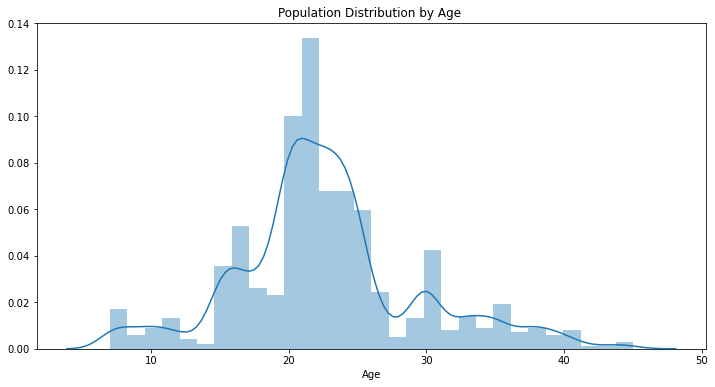

In [58]:
#Plot distribution of dataset by age
plt.figure(figsize=(12,6))
sns.distplot(df['Age'], bins=30)
plt.title('Population Distribution by Age ')
plt.show()

In [62]:
#Least Profitable Items
#Create new df for Top 5 Items
pitems = df.groupby(by=['Item ID','Item Name']).sum().sort_values('Price',ascending=True).head(20)
pitems.drop(['Purchase ID','Age'], axis=1,inplace=True)
pitems.rename(columns={'Price':'Total_Purchase_Value'}, inplace=True)

#Add Purchase Count Column for Identified  Top Spenders
icounts = []
for x in range(0,len(pitems.index)):
 icounts.append(df.loc[df['Item ID']==pitems.index[x][0]]['Item ID'].count())

pitems['Purchase_Count'] = icounts

#Add individual Item Price column
#Add individual item price, we use the average as some items have different unitary price
iprice = []
for x in range(0,len(pitems.index)):
 iprice.append(df.loc[df['Item ID']==pitems.index[x][0]]['Price'].mean())

pitems['Item_Price']=iprice

#Fix formats for columns with financial data
pitems['Item_Price'] = pitems['Item_Price'].map('${:.2f}'.format)
pitems['Total_Purchase_Value'] = pitems['Total_Purchase_Value'].map('${:.2f}'.format)

#Fix order of columns in table
pitems = pitems[['Purchase_Count','Item_Price','Total_Purchase_Value']]

#Visualize Most Profitable Items Dataframe
pitems.sort_values(by='Purchase_Count')

,,Purchase_Count,Item_Price,Total_Purchase_Value
Item ID,Item Name,,,
42,The Decapitator,1,$1.75,$1.75
104,Gladiator's Glaive,1,$1.93,$1.93
126,Exiled Mithril Longsword,1,$2.00,$2.00
118,"Ghost Reaver, Longsword of Magic",1,$2.17,$2.17
47,"Alpha, Reach of Ending Hope",1,$3.58,$3.58
90,Betrayer,1,$2.94,$2.94
91,Celeste,1,$4.17,$4.17
27,"Riddle, Tribute of Ended Dreams",1,$3.30,$3.30
177,"Winterthorn, Defender of Shifting Worlds",2,$2.08,$4.16
